<a href="https://colab.research.google.com/github/fibleep/sludge-water-plant/blob/main/water_plants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Waste Management in a Water Purification Plant
Client X has two input streams with used water that they clean using two large tanks. These tanks are filled
with living bacteria that eat the contaminants in the water, i.e. cleaning it. The bacteria will be less active
or even die if they get too much or too little food (contaminants), too much or too little oxygen, or if the
correct pH is not maintained. If this happens the sludge concentration at the exit of the tanks, i.e. our
target variable, will be to high and additional expensive cleaning steps need to be performed. It is your job
to forecast this sludge concentration 4h in advance.

## Our Variables

|Name    |Description                         |Units|
|--------|------------------------------------|-----|
|InputC1 |O2 percentage in tank 1             |%    |
|InputC2 |Liquid to reduce the pH in tank 1   |l/h  |
|InputC3 |Filtered sludge going back to tank 1|m3/h |
|InputC4 |Outside air                         |Nm3/h|
|InputC5 |Height in tank 1                    |m    |
|InputC6 |Flowrate to pH measurement in tank 1|l/h  |
|InputC7 |pH of liquid in tank 1              |pH   |
|InputC8 |Flowrate to O2 measurement in tank 1|l/h  |
|InputC9 |O2 dissolved in tank 1              |mg/l |
|InputC10|Temperature of liquid in tank 1     |°C   |
|        |                                    |     |
|InputE1 |Consentration of sludge             |g/l  |
|InputE2 |Conductivity                        |mS   |
|InputE3 |NO3 dissolved                       |mg/l |
|        |                                    |     |
|InputD1 |O2 percentage in tank 2             |%    |
|InputD2 |Liquid to reduce the pH in tank 2   |l/h  |
|InputD3 |Filtered sludge going back to tank 2|m3/h |
|InputD4 |Outside air                         |Nm3/h|
|InputD5 |Height in tank 2                    |m    |
|InputD6 |Flowrate to pH measurement in tank 1|l/h  |
|InputD7 |pH of liquid in tank 2              |pH   |
|InputD8 |Flowrate to O2 measurement in tank 2|l/h  |
|InputD9 |O2 dissolved in tank 2              |mg/l |
|InputD10|Temperature of liquid in tank 2     |°C   |
|        |                                    |     |
|InputA1 |Temperature                         |°C   |
|InputA2 |Flowrate                            |m3/h |
|InputA3 |Amount of sludge in water           |mg/l |
|InputA4 |Conductivity                        |mS/cm|
|InputA5 |                                    |kg/h |
|InputA6 |pH                                  |pH   |
|        |                                    |     |
|InputB1 |Temperature                         |°C   |
|InputB2 |Flowrate                            |m3/h |
|InputB3 |Amount of sludge in water           |mg/l |
|InputB4 |Conductivity                        |mS/cm|
|InputB5 |                                    |kg/h |
|InputB6 |pH                                  |pH   |
|        |                                    |     |
|Target  |Target variable                     |mg/L |


# EDA

## Loading in data and installing necessary packages

In [28]:
!git clone https://github.com/fibleep/sludge-water-plant.git
!pip install pandas numpy seaborn matplotlib xgboost

fatal: destination path 'sludge-water-plant' already exists and is not an empty directory.


In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


df = pd.read_csv("/content/sludge-water-plant/dataset/dataset.csv",index_col=[0])
df.index = pd.to_datetime(df.index)
df.head()

,InputC1,InputC2,InputC3,InputC4,InputC5,InputC6,InputC7,InputC8,InputC9,InputC10,...,InputA4,InputA5,InputA6,InputB1,InputB2,InputB3,InputB4,InputB5,InputB6,Target
2022-01-01 00:00:00,18.49650,18.81396,100.0696,618.6791,NaN,1931.360,7.272931,1878.295,1.549485,27.25480,...,60.10090,7.385031,7.081979,27.39823,20.89696,260.1674,2.193955,NaN,6.236635,NaN
2022-01-01 00:05:00,18.49731,18.70401,100.0715,613.7349,NaN,1929.365,7.273591,1878.252,1.552745,27.25177,...,60.09105,7.375766,7.136544,27.07825,26.92165,259.9575,2.187813,NaN,6.238485,NaN
2022-01-01 00:10:00,18.49693,18.59405,100.0733,608.7906,NaN,1924.322,7.274251,1878.209,1.556006,27.24874,...,60.08120,7.366502,7.085941,26.75828,14.01370,259.7475,2.181671,NaN,6.240336,NaN
2022-01-01 00:15:00,18.49603,18.48410,100.0751,603.8464,NaN,1919.279,7.274910,1878.167,1.559266,27.24572,...,60.07135,7.357237,6.743883,26.50328,5.78938,259.5375,2.175529,NaN,6.242187,NaN
2022-01-01 00:20:00,18.49512,18.37415,100.0770,598.9022,NaN,1914.235,7.275570,1878.124,1.562526,27.24269,...,60.06150,7.347972,6.621848,26.29828,39.27962,259.3275,2.169388,NaN,6.244037,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76474 entries, 2022-01-01 00:00:00 to 2022-09-23 13:45:00
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   InputC1   71948 non-null  float64
 1   InputC2   70943 non-null  float64
 2   InputC3   71116 non-null  float64
 3   InputC4   76396 non-null  float64
 4   InputC5   67461 non-null  float64
 5   InputC6   70914 non-null  float64
 6   InputC7   70852 non-null  float64
 7   InputC8   70828 non-null  float64
 8   InputC9   70880 non-null  float64
 9   InputC10  70802 non-null  float64
 10  InputE1   70871 non-null  float64
 11  InputE2   74587 non-null  float64
 12  InputE3   33120 non-null  float64
 13  InputD1   71923 non-null  float64
 14  InputD2   71190 non-null  float64
 15  InputD3   71138 non-null  float64
 16  InputD4   76398 non-null  float64
 17  InputD5   66353 non-null  float64
 18  InputD6   70881 non-null  float64
 19  InputD7   71128 non-null  float6

Looks like the data is collected every 5 minutes, NaN values are present, the target column can be NaN as well

In [31]:
missing_values = df.isnull().sum() / len(df)
missing_values.sort_values(ascending=False).head(5)

InputE3    0.566912
InputB5    0.435547
InputA2    0.332427
InputD5    0.132346
InputA4    0.125847
dtype: float64

The ratio of nulls, it looks like E3, B5, A2 are null the most often

E3 -> NO3 dissolved

B5 -> Not Specified

A2 -> Flow rate


What can we deduce from this?

Some bacteria need nitrogen, I assume that's why NO3 is sometimes null and sometimes not.

B5 is not specified


In [32]:
df['Target'].describe()

count    70286.000000
mean        51.028149
std         44.037615
min         -0.011699
25%         21.311235
50%         33.956840
75%         62.185650
max        203.460900
Name: Target, dtype: float64

This is sludge, in mg/L. The negative value is probably a mistake of the readings.

It looks like there's quite a bit of variation, there are some really high outliers but generally it should be around 30-40 mg/L

In [33]:
corr = df.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
corr = corr.unstack().transpose().sort_values(ascending=False).dropna()
corr[:20]

InputD10  InputC10    0.997912
InputD4   InputC4     0.985786
InputD1   InputC1     0.973743
InputA5   InputA3     0.860394
          InputC4     0.802451
InputB5   InputB3     0.800484
InputA5   InputD4     0.793131
InputD7   InputC7     0.772154
Target    InputD5     0.762300
InputD5   InputC5     0.742540
InputA3   InputC4     0.711730
InputD9   InputC9     0.700897
InputA3   InputD4     0.693287
InputC4   InputC2     0.572892
InputD4   InputC2     0.571811
InputA5   InputE1     0.569396
InputA3   InputE1     0.561188
Target    InputC5     0.559241
InputD4   InputE1     0.549919
InputE1   InputC4     0.536829
dtype: float64

The most correlated and interesting features are:

- D10 - C10 - Temperatures in both tanks
- D4 - C4 - Outside air
- D1 - C1 - 02 Percentage in Tanks
- A5 - A3 - ???? / Amount of sludge in water
   - This seems like a very important correlation, shame there's no description for A5, need to keep this in mind
- A5 - D4 - ???? / Outside air
  - Another correlation with the missing feature
- Target/D5 Height of the 2nd tank
  - The 2nd tank is more correlated with the target than the first tank
- A3 / C4 & D4 - Amount of sludge / Air outside

array([[<Axes: title={'center': 'InputC1'}>,
        <Axes: title={'center': 'InputC2'}>,
        <Axes: title={'center': 'InputC3'}>,
        <Axes: title={'center': 'InputC4'}>,
        <Axes: title={'center': 'InputC5'}>,
        <Axes: title={'center': 'InputC6'}>],
       [<Axes: title={'center': 'InputC7'}>,
        <Axes: title={'center': 'InputC8'}>,
        <Axes: title={'center': 'InputC9'}>,
        <Axes: title={'center': 'InputC10'}>,
        <Axes: title={'center': 'InputE1'}>,
        <Axes: title={'center': 'InputE2'}>],
       [<Axes: title={'center': 'InputE3'}>,
        <Axes: title={'center': 'InputD1'}>,
        <Axes: title={'center': 'InputD2'}>,
        <Axes: title={'center': 'InputD3'}>,
        <Axes: title={'center': 'InputD4'}>,
        <Axes: title={'center': 'InputD5'}>],
       [<Axes: title={'center': 'InputD6'}>,
        <Axes: title={'center': 'InputD7'}>,
        <Axes: title={'center': 'InputD8'}>,
        <Axes: title={'center': 'InputD9'}>,
      

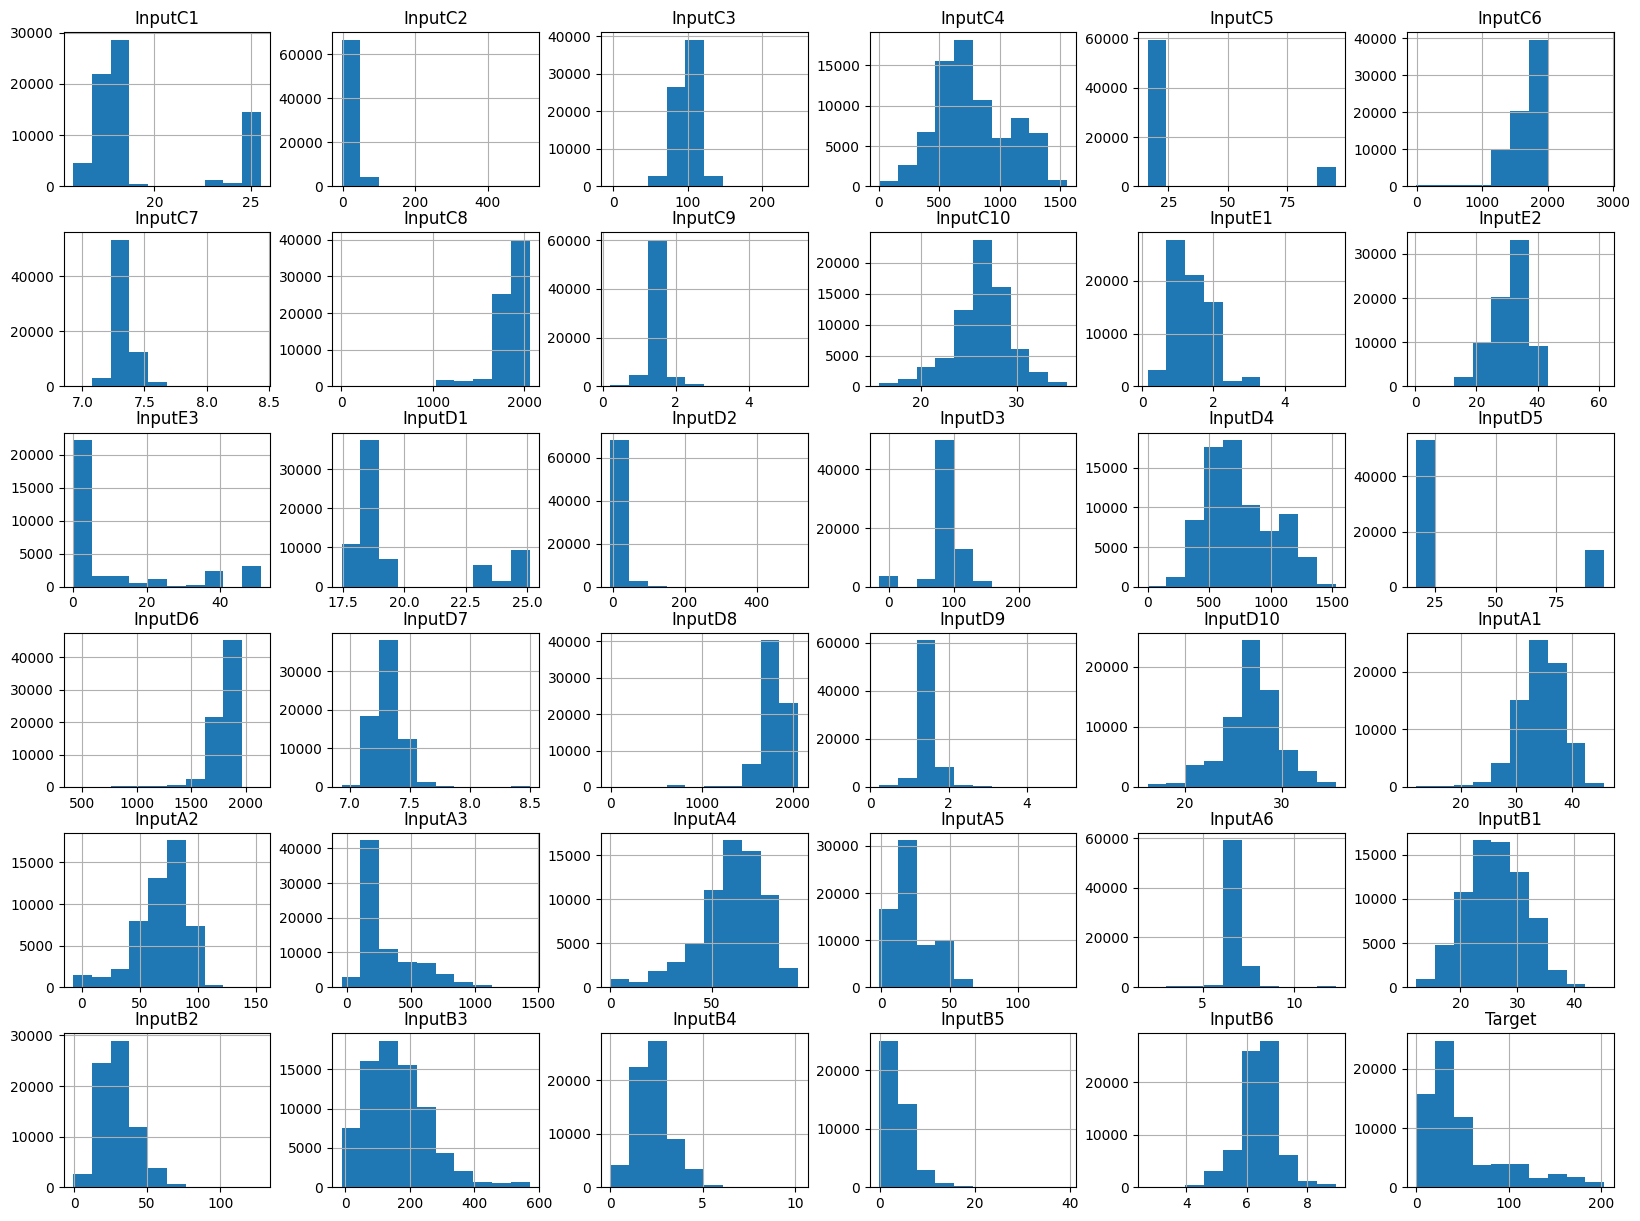

In [34]:
df.hist(figsize=(20,15))

## Exploration of Outliers

## Data Augmentation

The value that's null the most often is E3 - NO3 dissolved, let's assume that is because it is 0 or close to 0. Looking at the histogram, E3 is mostly 0.

In [35]:
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(df)
X = imputer.transform(df)

df = pd.DataFrame(X, columns=df.columns, index=df.index)

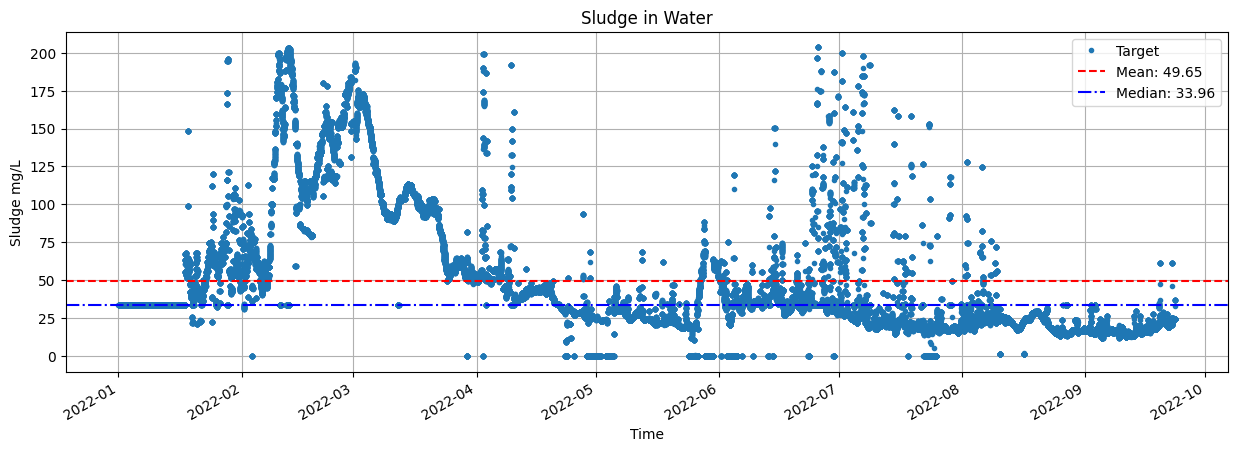

In [36]:
def plot_target(df):
  df['Target'].plot(
      style='.',
      figsize=(15, 5),
      title='Sludge in Water',
      grid=True,
      xlabel="Time",
      ylabel="Sludge mg/L"
      )

  mean_value = df['Target'].mean()
  median_value = df['Target'].median()

  plt.axhline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
  plt.axhline(median_value, color='blue', linestyle='-.', label=f'Median: {median_value:.2f}')

  plt.legend()
  plt.show()

plot_target(df)

It looks like the data was pretty unstable throughout the year with huge spikes in February, March, April and July.

### Create Features

In [37]:
# def create_features(df):
#     """
#     Create time series features based on time series index.
#     """
#     df = df.copy()
#     df['hour'] = df.index.hour
#     df['dayofweek'] = df.index.dayofweek
#     df['quarter'] = df.index.quarter
#     df['month'] = df.index.month
#     df['year'] = df.index.year
#     df['dayofyear'] = df.index.dayofyear
#     df['dayofmonth'] = df.index.day
#     df['weekofyear'] = df.index.isocalendar().week
#     return df
# df = create_features(df)

### Investigating the seasonal anomalies

Null Ratio: 0.0


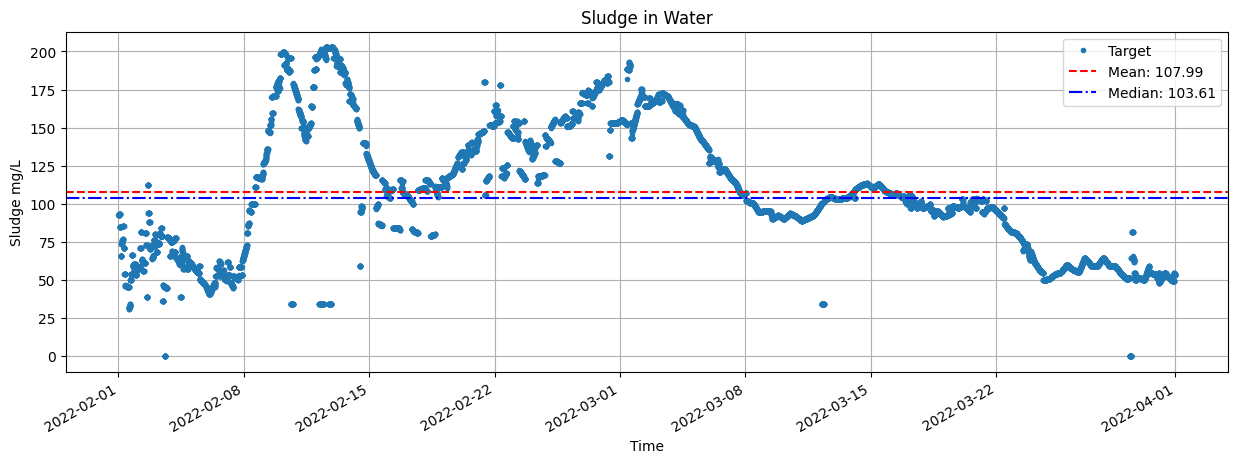

In [38]:
spring_anomalies = df.loc[(df.index > "02-01-2022") & (df.index < "04-01-2022")]
print(f"Null Ratio: {spring_anomalies['Target'].isnull().sum() / len(spring_anomalies)}")
plot_target(spring_anomalies)

Null Ratio: 0.0


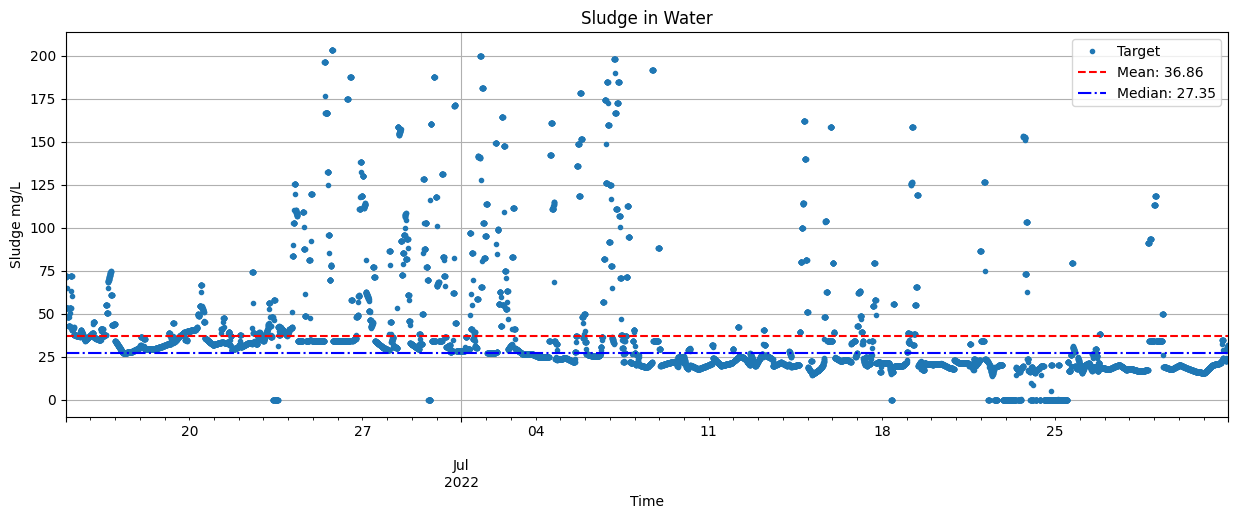

In [39]:
summer_anomalies = df.loc[(df.index > "06-15-2022") & (df.index < "08-01-2022")]
print(f"Null Ratio: {summer_anomalies['Target'].isnull().sum() / len(summer_anomalies)}")
plot_target(summer_anomalies)

For the summer anomalies, I would like to see only the outlier points

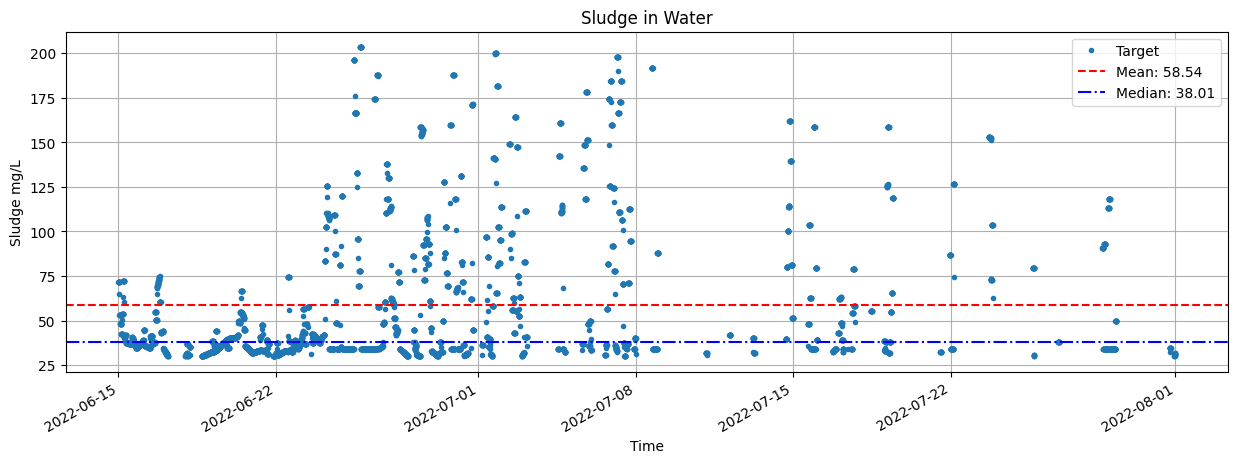

In [40]:
summer_anomalies = summer_anomalies[summer_anomalies['Target']> 30]
plot_target(summer_anomalies)

# Train our model(s)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test, is_3d=False):
    """
    Evaluate the model
    """

    if is_3d:
        X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R2 Score:", r2)

## XGBoost - Winner!

In [43]:
import xgboost as xgb

reg = xgb.XGBRegressor(
    base_score=0.5,
    booster="gbtree",
    n_estimators=10000,
    objective="reg:linear",
    eta=0.29967676424275075,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.98,
    colsample_bytree=0.8352332105721674,
    gamma=5.070672686392608,
    min_child_weight= 8.064241707732917,
)
reg.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    early_stopping_rounds=50,
    verbose=100
)


[0]	validation_0-rmse:62.04932	validation_1-rmse:61.15639


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:03] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:4.27695	validation_1-rmse:6.19042
[200]	validation_0-rmse:2.91210	validation_1-rmse:5.35042
[300]	validation_0-rmse:2.28502	validation_1-rmse:5.02635
[400]	validation_0-rmse:1.93772	validation_1-rmse:4.88733
[500]	validation_0-rmse:1.84728	validation_1-rmse:4.85331
[600]	validation_0-rmse:1.79941	validation_1-rmse:4.83604
[700]	validation_0-rmse:1.77005	validation_1-rmse:4.82629
[800]	validation_0-rmse:1.76422	validation_1-rmse:4.82367
[900]	validation_0-rmse:1.75215	validation_1-rmse:4.81958
[1000]	validation_0-rmse:1.74156	validation_1-rmse:4.81791
[1100]	validation_0-rmse:1.72521	validation_1-rmse:4.81219
[1200]	validation_0-rmse:1.71035	validation_1-rmse:4.80838
[1287]	validation_0-rmse:1.70662	validation_1-rmse:4.80820


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8352332105721674, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eta=0.29967676424275075, eval_metric=None, feature_types=None,
             gamma=5.070672686392608, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=8.064241707732917, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10000,
             n_jobs=None, num_parallel_tree=None, ...)

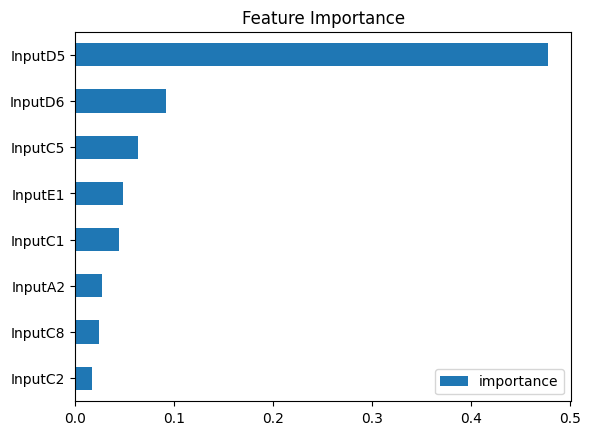

In [44]:
fi = pd.DataFrame(
    data=reg.feature_importances_, index=reg.feature_names_in_, columns=["importance"]
)
fi.sort_values("importance")[-8:].plot(kind="barh", title="Feature Importance")
plt.show()

D5 is the most important feature according to our regressor. D5 is the height of the container

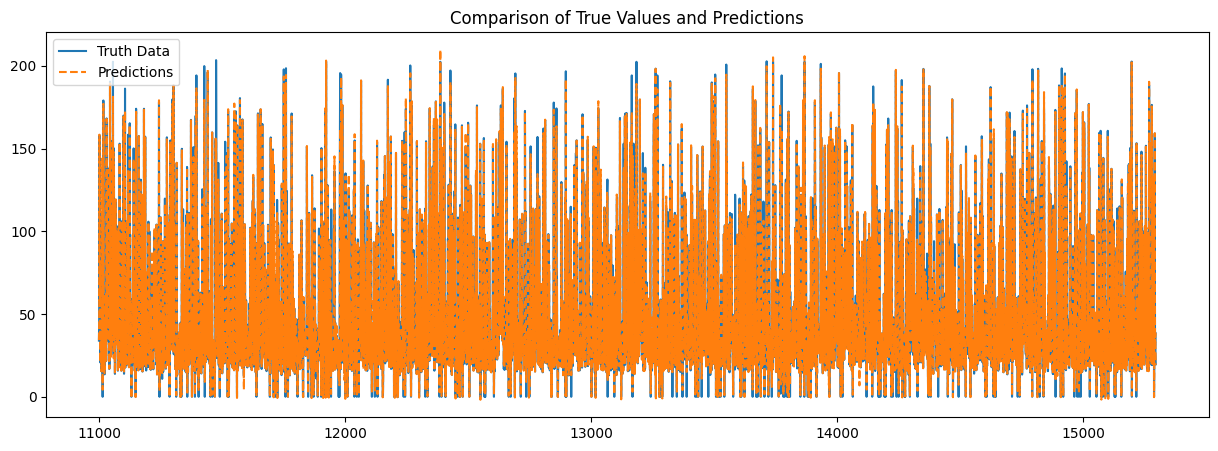

In [45]:
y_pred = reg.predict(X_test)
predict_df = pd.DataFrame({'True Values': y_test, 'Predictions': y_pred})
predict_df.index = X_test.index
plot_df = predict_df.reset_index()[11000:]

plt.figure(figsize=(15, 5))
plt.plot(plot_df['True Values'], label='Truth Data')
plt.plot(plot_df['Predictions'], label='Predictions',linestyle='--')
plt.legend()
plt.title('Comparison of True Values and Predictions')
plt.show()

Predictions for last 1000 entries

In [46]:
print("\n\nVAL SET:")
evaluate_model(reg, X_val, y_val)


print("\n\nTEST SET:")
evaluate_model(reg, X_test, y_test)



VAL SET:
Mean Absolute Error (MAE): 1.5772998317028781
Mean Squared Error (MSE): 23.115905494988965
Root Mean Squared Error (RMSE): 4.807900320824982
R2 Score: 0.9869893972779294


TEST SET:
Mean Absolute Error (MAE): 1.6123974246083743
Mean Squared Error (MSE): 23.856094891323178
Root Mean Squared Error (RMSE): 4.884270149297966
R2 Score: 0.9866891841985774


4.8 RMSE / 4.9 RMSE

5.2 / 5.7 when strategy for imputing is `most_frequent`

5.3 / 5.5 when strategy is `constant` and `fill_value=0`


Some other improvements would be to scale the data, since on the charts we can see that some columns have a long tail

XGB looks very promising, let's try improving it. To do that we will use `Optuna`, a framework for finding the best hyperparameters

In [47]:
!pip install optuna

In [48]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error


def objective(trial):
    """
    Using Optuna to find the best hyperparameters
    """
    # Define the search space for hyperparameters
    param = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'num_boost_round': 100000, # Fix the boosting round and use early stopping
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 10.0),
        'min_child_weight': trial.suggest_float('min_child_weight', 0.1, 10.0),
        'lambda': trial.suggest_float('lambda', 0.1, 10.0),
        'alpha': trial.suggest_float('alpha', 0.0, 10.0),
    }

    # Split the data into further training and validation sets (three sets are preferable)
    train_data, valid_data, train_target, valid_target = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Convert the data into DMatrix format
    dtrain = xgb.DMatrix(train_data, label=train_target)
    dvalid = xgb.DMatrix(valid_data, label=valid_target)

    # Define the pruning callback for early stopping
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'validation-rmse')

    # Train the model with early stopping
    model = xgb.train(param, dtrain, evals=[(dvalid, 'validation')], early_stopping_rounds=100, callbacks=[pruning_callback])

    # Make predictions on the test set
    dtest = xgb.DMatrix(valid_data)
    y_pred = model.predict(dtest)

    # Calculate the root mean squared error
    rmse = mean_squared_error(valid_target, y_pred, squared=False)

    return rmse

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100) # Control the number of trials

# Print the best hyperparameters and the best RMSE
best_params = study.best_params
best_rmse = study.best_value
print("Best Hyperparameters: ", best_params)
print("Best RMSE: ", best_rmse)


[I 2023-11-26 13:48:41,169] A new study created in memory with name: no-name-dd876f23-f783-46d2-9db0-878b796fcae8


[0]	validation-rmse:34.09631
[1]	validation-rmse:27.52213


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:22.70350
[3]	validation-rmse:18.91094
[4]	validation-rmse:16.05841
[5]	validation-rmse:14.00471
[6]	validation-rmse:12.46876
[7]	validation-rmse:11.27129
[8]	validation-rmse:10.39157
[9]	validation-rmse:9.78806


[I 2023-11-26 13:48:41,561] Trial 0 finished with value: 9.788059667438338 and parameters: {'eta': 0.22620340438844275, 'max_depth': 10, 'subsample': 0.8791535143991929, 'colsample_bytree': 0.9877497019129009, 'gamma': 8.955900134834032, 'min_child_weight': 5.881349201725497, 'lambda': 2.9504763555530107, 'alpha': 3.7243597344216783}. Best is trial 0 with value: 9.788059667438338.


[0]	validation-rmse:33.56245
[1]	validation-rmse:27.21587
[2]	validation-rmse:22.73530
[3]	validation-rmse:19.53739
[4]	validation-rmse:17.36894
[5]	validation-rmse:15.78466
[6]	validation-rmse:14.65291
[7]	validation-rmse:13.83093
[8]	validation-rmse:13.21932
[9]	validation-rmse:12.86206


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:48:41,762] Trial 1 finished with value: 12.862060672575709 and parameters: {'eta': 0.25664112299646663, 'max_depth': 7, 'subsample': 0.7571247921204346, 'colsample_bytree': 0.9589739699442652, 'gamma': 1.2686045113933586, 'min_child_weight': 7.46721959956692, 'lambda': 6.645688554361279, 'alpha': 5.783035838774743}. Best is trial 0 with value: 9.788059667438338.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:34.51553
[1]	validation-rmse:29.04526
[2]	validation-rmse:25.40487
[3]	validation-rmse:23.02510
[4]	validation-rmse:21.41014
[5]	validation-rmse:20.04675
[6]	validation-rmse:19.21940
[7]	validation-rmse:18.49449
[8]	validation-rmse:17.99139
[9]	validation-rmse:17.55804


[I 2023-11-26 13:48:41,912] Trial 2 finished with value: 17.558044447137878 and parameters: {'eta': 0.25474519270936724, 'max_depth': 4, 'subsample': 0.6458202943788964, 'colsample_bytree': 0.7940848696783078, 'gamma': 8.458461561100478, 'min_child_weight': 8.320608372587897, 'lambda': 4.12033667303206, 'alpha': 8.127132994751843}. Best is trial 0 with value: 9.788059667438338.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:38.82423
[1]	validation-rmse:35.67240
[2]	validation-rmse:33.11040
[3]	validation-rmse:30.87627
[4]	validation-rmse:29.21964
[5]	validation-rmse:27.63365
[6]	validation-rmse:26.30185
[7]	validation-rmse:25.19017
[8]	validation-rmse:24.21256
[9]	validation-rmse:23.38035


[I 2023-11-26 13:48:42,063] Trial 3 finished with value: 23.380346951855255 and parameters: {'eta': 0.12290034864443174, 'max_depth': 3, 'subsample': 0.7294722786903118, 'colsample_bytree': 0.7343358297577314, 'gamma': 9.315123036714558, 'min_child_weight': 5.632442566042721, 'lambda': 7.849419441250976, 'alpha': 1.2028448243215129}. Best is trial 0 with value: 9.788059667438338.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:41.02376
[1]	validation-rmse:39.58553
[2]	validation-rmse:38.27957
[3]	validation-rmse:37.03649
[4]	validation-rmse:36.00573
[5]	validation-rmse:34.90383
[6]	validation-rmse:33.87911
[7]	validation-rmse:33.01150
[8]	validation-rmse:32.11651
[9]	validation-rmse:31.22271


[I 2023-11-26 13:48:42,219] Trial 4 finished with value: 31.22270959788962 and parameters: {'eta': 0.050236952596559595, 'max_depth': 3, 'subsample': 0.5614587219345752, 'colsample_bytree': 0.7245730219375273, 'gamma': 4.4656836525204655, 'min_child_weight': 5.816051038157716, 'lambda': 6.944860608707736, 'alpha': 7.646282869179925}. Best is trial 0 with value: 9.788059667438338.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:41.88300


[I 2023-11-26 13:48:42,310] Trial 5 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:48:42,398] Trial 6 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:41.13077


[I 2023-11-26 13:48:42,489] Trial 7 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:48:42,584] Trial 8 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:48:42,684] Trial 9 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.18426
[1]	validation-rmse:23.26047
[2]	validation-rmse:18.08747
[3]	validation-rmse:14.52010
[4]	validation-rmse:11.95761
[5]	validation-rmse:10.52002
[6]	validation-rmse:9.27649
[7]	validation-rmse:8.43389
[8]	validation-rmse:7.94701
[9]	validation-rmse:7.65951


[I 2023-11-26 13:48:43,109] Trial 10 finished with value: 7.659507019533622 and parameters: {'eta': 0.29727600854954944, 'max_depth': 10, 'subsample': 0.977855139180486, 'colsample_bytree': 0.9987034491929038, 'gamma': 7.328222476352, 'min_child_weight': 0.12879339334037887, 'lambda': 0.5551665969973891, 'alpha': 3.162527609744395}. Best is trial 10 with value: 7.659507019533622.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.24459
[1]	validation-rmse:23.39853
[2]	validation-rmse:17.89578
[3]	validation-rmse:14.31794
[4]	validation-rmse:11.92028
[5]	validation-rmse:10.34671
[6]	validation-rmse:9.09792
[7]	validation-rmse:8.38744
[8]	validation-rmse:7.91366
[9]	validation-rmse:7.49915


[I 2023-11-26 13:48:43,572] Trial 11 finished with value: 7.499150149119096 and parameters: {'eta': 0.2938194762082569, 'max_depth': 10, 'subsample': 0.961515248353603, 'colsample_bytree': 0.9919786858590304, 'gamma': 7.854570123057067, 'min_child_weight': 0.22814225570528318, 'lambda': 0.2676892092181584, 'alpha': 3.0284388407669693}. Best is trial 11 with value: 7.499150149119096.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.36291
[1]	validation-rmse:23.50724
[2]	validation-rmse:18.08695
[3]	validation-rmse:14.48122
[4]	validation-rmse:11.99757
[5]	validation-rmse:10.46796
[6]	validation-rmse:9.30680
[7]	validation-rmse:8.47685
[8]	validation-rmse:8.04059
[9]	validation-rmse:7.71909


[I 2023-11-26 13:48:44,367] Trial 12 finished with value: 7.719089601867115 and parameters: {'eta': 0.2908514820368875, 'max_depth': 10, 'subsample': 0.9556910445048593, 'colsample_bytree': 0.9785877439729738, 'gamma': 7.27301807448972, 'min_child_weight': 0.19371240095719028, 'lambda': 0.2848380146210376, 'alpha': 2.703432099624448}. Best is trial 11 with value: 7.499150149119096.


[0]	validation-rmse:31.60886
[1]	validation-rmse:24.29444
[2]	validation-rmse:19.36785
[3]	validation-rmse:16.44830
[4]	validation-rmse:14.04338


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	validation-rmse:12.47379
[6]	validation-rmse:11.44224
[7]	validation-rmse:10.51066
[8]	validation-rmse:9.91478
[9]	validation-rmse:9.49263


[I 2023-11-26 13:48:44,659] Trial 13 finished with value: 9.492628664205156 and parameters: {'eta': 0.2979085756095057, 'max_depth': 8, 'subsample': 0.9899336964349339, 'colsample_bytree': 0.8816664806586451, 'gamma': 7.402095346607613, 'min_child_weight': 0.11253343313269948, 'lambda': 0.13121452983652448, 'alpha': 2.924606079172564}. Best is trial 11 with value: 7.499150149119096.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:48:44,789] Trial 14 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.35914
[1]	validation-rmse:23.78358
[2]	validation-rmse:18.71996
[3]	validation-rmse:15.14576
[4]	validation-rmse:12.93319
[5]	validation-rmse:11.49924
[6]	validation-rmse:10.38594
[7]	validation-rmse:9.55066
[8]	validation-rmse:8.98551
[9]	validation-rmse:8.54719


[I 2023-11-26 13:48:45,139] Trial 15 finished with value: 8.547192019573709 and parameters: {'eta': 0.29893247027928854, 'max_depth': 9, 'subsample': 0.9907692352492563, 'colsample_bytree': 0.9120096075385156, 'gamma': 8.068842659455008, 'min_child_weight': 1.2151606428135315, 'lambda': 1.2591340528658321, 'alpha': 0.12718727176742917}. Best is trial 11 with value: 7.499150149119096.


[0]	validation-rmse:35.60378


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:48:45,266] Trial 16 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:32.03786
[1]	validation-rmse:24.37276
[2]	validation-rmse:19.18266
[3]	validation-rmse:15.26419
[4]	validation-rmse:12.68001
[5]	validation-rmse:10.77438
[6]	validation-rmse:9.52722
[7]	validation-rmse:8.72445
[8]	validation-rmse:8.16036
[9]	validation-rmse:7.69643


[I 2023-11-26 13:48:45,886] Trial 17 finished with value: 7.696427358272415 and parameters: {'eta': 0.27262247304303844, 'max_depth': 10, 'subsample': 0.9192158902949806, 'colsample_bytree': 0.9272064414379205, 'gamma': 6.274365258147298, 'min_child_weight': 1.2698237463509083, 'lambda': 0.29900340651069757, 'alpha': 1.8976513986764607}. Best is trial 11 with value: 7.499150149119096.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.93593


[I 2023-11-26 13:48:46,104] Trial 18 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:33.62606


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:48:46,278] Trial 19 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:48:47,156] Trial 20 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.98270
[1]	validation-rmse:24.32792
[2]	validation-rmse:19.10285
[3]	validation-rmse:15.37331
[4]	validation-rmse:12.73577
[5]	validation-rmse:11.01574
[6]	validation-rmse:9.83476
[7]	validation-rmse:9.00850
[8]	validation-rmse:8.35608
[9]	validation-rmse:8.00049


[I 2023-11-26 13:48:49,009] Trial 21 finished with value: 8.000492474891395 and parameters: {'eta': 0.273155373291687, 'max_depth': 10, 'subsample': 0.9307326955914795, 'colsample_bytree': 0.9350060201372459, 'gamma': 6.312306225366255, 'min_child_weight': 1.1925314870556418, 'lambda': 0.13504445876258386, 'alpha': 1.8458095918087083}. Best is trial 11 with value: 7.499150149119096.


[0]	validation-rmse:32.13938


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:48:49,158] Trial 22 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.45661
[1]	validation-rmse:23.77281
[2]	validation-rmse:18.58066
[3]	validation-rmse:15.18203
[4]	validation-rmse:12.86863
[5]	validation-rmse:11.33578
[6]	validation-rmse:10.14589
[7]	validation-rmse:9.53463
[8]	validation-rmse:9.19972
[9]	validation-rmse:8.59775


[I 2023-11-26 13:48:49,556] Trial 23 finished with value: 8.597752588414231 and parameters: {'eta': 0.297115048698987, 'max_depth': 9, 'subsample': 0.9542797801917826, 'colsample_bytree': 0.9986858385164575, 'gamma': 7.004261856543164, 'min_child_weight': 2.0130305155607546, 'lambda': 0.7029099903491256, 'alpha': 1.246912068776962}. Best is trial 11 with value: 7.499150149119096.


[0]	validation-rmse:32.98711


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:48:49,754] Trial 24 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:33.25511


[I 2023-11-26 13:48:49,882] Trial 25 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.99040


[I 2023-11-26 13:48:50,038] Trial 26 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:48:50,164] Trial 27 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.87275
[1]	validation-rmse:24.35756


[I 2023-11-26 13:48:50,358] Trial 28 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:34.16475


[I 2023-11-26 13:48:50,549] Trial 29 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:32.74083


[I 2023-11-26 13:48:50,690] Trial 30 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.20352
[1]	validation-rmse:23.39115
[2]	validation-rmse:18.14001
[3]	validation-rmse:14.59750
[4]	validation-rmse:12.11560
[5]	validation-rmse:10.47524
[6]	validation-rmse:9.44956
[7]	validation-rmse:8.75154
[8]	validation-rmse:8.26290
[9]	validation-rmse:7.93825


[I 2023-11-26 13:48:51,134] Trial 31 finished with value: 7.9382464064743425 and parameters: {'eta': 0.2960235261306893, 'max_depth': 10, 'subsample': 0.9470931456810772, 'colsample_bytree': 0.9666344035862435, 'gamma': 7.356341415427919, 'min_child_weight': 0.14928216587021653, 'lambda': 0.5365723702512367, 'alpha': 2.6659835167768797}. Best is trial 11 with value: 7.499150149119096.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:48:51,308] Trial 32 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:33.41612


[I 2023-11-26 13:48:51,480] Trial 33 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:48:51,657] Trial 34 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:33.56581


[I 2023-11-26 13:48:51,788] Trial 35 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.54239
[1]	validation-rmse:23.94205
[2]	validation-rmse:18.71351
[3]	validation-rmse:15.14456
[4]	validation-rmse:12.52309
[5]	validation-rmse:10.69294
[6]	validation-rmse:9.60637
[7]	validation-rmse:8.74247
[8]	validation-rmse:8.16355
[9]	validation-rmse:7.73795


[I 2023-11-26 13:48:52,203] Trial 36 finished with value: 7.737948812285534 and parameters: {'eta': 0.2882708384627041, 'max_depth': 10, 'subsample': 0.9382998011193769, 'colsample_bytree': 0.9684926267277049, 'gamma': 6.8240575723970025, 'min_child_weight': 1.604171417674019, 'lambda': 0.8598838414115636, 'alpha': 3.1557612518694045}. Best is trial 11 with value: 7.499150149119096.


[0]	validation-rmse:32.76596


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:48:52,342] Trial 37 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:32.38373


[I 2023-11-26 13:48:52,481] Trial 38 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:48:52,607] Trial 39 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:48:52,752] Trial 40 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.58985
[1]	validation-rmse:23.93280
[2]	validation-rmse:18.64206
[3]	validation-rmse:15.00575
[4]	validation-rmse:12.53703
[5]	validation-rmse:10.86541
[6]	validation-rmse:9.69734
[7]	validation-rmse:8.82887
[8]	validation-rmse:8.41858
[9]	validation-rmse:7.97438


[I 2023-11-26 13:48:53,182] Trial 41 finished with value: 7.974376683818015 and parameters: {'eta': 0.287617696072555, 'max_depth': 10, 'subsample': 0.9429185309245344, 'colsample_bytree': 0.9803454909454498, 'gamma': 6.557942130988301, 'min_child_weight': 1.5354898025039105, 'lambda': 0.6336661842624938, 'alpha': 3.424175809514291}. Best is trial 11 with value: 7.499150149119096.


[0]	validation-rmse:31.40363


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:23.52028
[2]	validation-rmse:18.23532
[3]	validation-rmse:14.46895
[4]	validation-rmse:11.84014
[5]	validation-rmse:10.25005
[6]	validation-rmse:9.04153
[7]	validation-rmse:8.27275
[8]	validation-rmse:7.69964
[9]	validation-rmse:7.30232


[I 2023-11-26 13:48:53,617] Trial 42 finished with value: 7.302318973497686 and parameters: {'eta': 0.2908586520492196, 'max_depth': 10, 'subsample': 0.9747326493862266, 'colsample_bytree': 0.971251412481481, 'gamma': 6.966262759586023, 'min_child_weight': 0.6162048683171759, 'lambda': 0.6303881288852946, 'alpha': 3.0020360918299174}. Best is trial 42 with value: 7.302318973497686.


[0]	validation-rmse:31.25941
[1]	validation-rmse:23.55702
[2]	validation-rmse:18.27066
[3]	validation-rmse:14.91003


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[4]	validation-rmse:12.53654
[5]	validation-rmse:10.96686
[6]	validation-rmse:9.92950


[I 2023-11-26 13:48:53,918] Trial 43 pruned. Trial was pruned at iteration 6.


[0]	validation-rmse:32.38756


[I 2023-11-26 13:48:54,108] Trial 44 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:48:54,256] Trial 45 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:48:54,436] Trial 46 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:34.98911


[I 2023-11-26 13:48:54,577] Trial 47 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:48:55,892] Trial 48 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:48:57,194] Trial 49 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:48:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.58607
[1]	validation-rmse:23.85829
[2]	validation-rmse:18.52000
[3]	validation-rmse:15.04181
[4]	validation-rmse:12.45234
[5]	validation-rmse:10.72315
[6]	validation-rmse:9.58483
[7]	validation-rmse:8.77668
[8]	validation-rmse:8.20258
[9]	validation-rmse:7.93497


[I 2023-11-26 13:49:01,007] Trial 50 finished with value: 7.93497130529334 and parameters: {'eta': 0.28875030352039094, 'max_depth': 10, 'subsample': 0.9857075339431219, 'colsample_bytree': 0.9775867469446916, 'gamma': 8.296421416264304, 'min_child_weight': 1.1026966621604761, 'lambda': 1.1542396997483801, 'alpha': 3.350599513358662}. Best is trial 42 with value: 7.302318973497686.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.59482


[I 2023-11-26 13:49:03,296] Trial 51 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:49:03,770] Trial 52 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:32.42306


[I 2023-11-26 13:49:04,149] Trial 53 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.64101


[I 2023-11-26 13:49:05,183] Trial 54 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.37297
[1]	validation-rmse:23.86586
[2]	validation-rmse:18.87703


[I 2023-11-26 13:49:06,766] Trial 55 pruned. Trial was pruned at iteration 2.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:49:07,998] Trial 56 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:32.26655


[I 2023-11-26 13:49:09,122] Trial 57 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:49:09,491] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:49:10,229] Trial 59 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:33.85292


[I 2023-11-26 13:49:11,084] Trial 60 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.61776


[I 2023-11-26 13:49:12,463] Trial 61 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.86059


[I 2023-11-26 13:49:13,005] Trial 62 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.54844


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:23.94188


[I 2023-11-26 13:49:13,217] Trial 63 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:32.49710


[I 2023-11-26 13:49:13,431] Trial 64 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.40346
[1]	validation-rmse:23.70800
[2]	validation-rmse:18.40724
[3]	validation-rmse:14.74360
[4]	validation-rmse:12.35602
[5]	validation-rmse:10.69689
[6]	validation-rmse:9.54142
[7]	validation-rmse:8.86039
[8]	validation-rmse:8.25266
[9]	validation-rmse:7.86986


[I 2023-11-26 13:49:15,596] Trial 65 finished with value: 7.8698630810132 and parameters: {'eta': 0.29297385335816856, 'max_depth': 10, 'subsample': 0.967723495507952, 'colsample_bytree': 0.9254260963165307, 'gamma': 8.496444013427316, 'min_child_weight': 1.2367081081278612, 'lambda': 1.1465374118199292, 'alpha': 4.484053999686471}. Best is trial 42 with value: 7.302318973497686.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:32.08063


[I 2023-11-26 13:49:15,916] Trial 66 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:49:16,072] Trial 67 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.42755
[1]	validation-rmse:23.75425


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:18.47110
[3]	validation-rmse:14.76258
[4]	validation-rmse:12.31757
[5]	validation-rmse:10.56883
[6]	validation-rmse:9.44534
[7]	validation-rmse:8.65612
[8]	validation-rmse:8.28779
[9]	validation-rmse:7.89514


[I 2023-11-26 13:49:16,495] Trial 68 finished with value: 7.895144962984055 and parameters: {'eta': 0.2936175973913512, 'max_depth': 10, 'subsample': 0.8654724162265662, 'colsample_bytree': 0.9471066937528093, 'gamma': 7.274006341793316, 'min_child_weight': 2.633343366025581, 'lambda': 1.5500937851316814, 'alpha': 1.877319714962089}. Best is trial 42 with value: 7.302318973497686.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:49:16,636] Trial 69 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.20162
[1]	validation-rmse:23.44544
[2]	validation-rmse:17.99443
[3]	validation-rmse:14.58688
[4]	validation-rmse:12.02883
[5]	validation-rmse:10.48898
[6]	validation-rmse:9.41210
[7]	validation-rmse:8.57835
[8]	validation-rmse:8.05368
[9]	validation-rmse:7.70305


[I 2023-11-26 13:49:17,012] Trial 70 finished with value: 7.703052741592354 and parameters: {'eta': 0.29378975846007904, 'max_depth': 10, 'subsample': 0.8981576851261552, 'colsample_bytree': 0.8831114745358623, 'gamma': 6.848202790024017, 'min_child_weight': 0.776124416075898, 'lambda': 0.11245956373978405, 'alpha': 2.5482833530526348}. Best is trial 42 with value: 7.302318973497686.


[0]	validation-rmse:31.26694
[1]	validation-rmse:23.46772


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:18.35181
[3]	validation-rmse:14.52600
[4]	validation-rmse:12.08012
[5]	validation-rmse:10.59718
[6]	validation-rmse:9.40079
[7]	validation-rmse:8.53597
[8]	validation-rmse:8.08221
[9]	validation-rmse:7.71572


[I 2023-11-26 13:49:17,410] Trial 71 finished with value: 7.715725010031894 and parameters: {'eta': 0.2936287327252698, 'max_depth': 10, 'subsample': 0.893682755149007, 'colsample_bytree': 0.8948180153508603, 'gamma': 6.976282704910868, 'min_child_weight': 0.7236740257381438, 'lambda': 0.3331619521072055, 'alpha': 2.507641144954723}. Best is trial 42 with value: 7.302318973497686.


[0]	validation-rmse:32.30842


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:49:17,566] Trial 72 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.70459


[I 2023-11-26 13:49:17,723] Trial 73 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.09074
[1]	validation-rmse:23.12552
[2]	validation-rmse:17.89196
[3]	validation-rmse:14.20308
[4]	validation-rmse:11.72849
[5]	validation-rmse:10.35521
[6]	validation-rmse:9.33716
[7]	validation-rmse:8.48745
[8]	validation-rmse:8.09221
[9]	validation-rmse:7.71773


[I 2023-11-26 13:49:18,142] Trial 74 finished with value: 7.7177306219685775 and parameters: {'eta': 0.2985446633655112, 'max_depth': 10, 'subsample': 0.9201399141889262, 'colsample_bytree': 0.8996864429506992, 'gamma': 6.913392134009582, 'min_child_weight': 0.687725145099103, 'lambda': 0.6617208244563784, 'alpha': 2.597110833781967}. Best is trial 42 with value: 7.302318973497686.


[0]	validation-rmse:31.29877
[1]	validation-rmse:23.61875


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:18.42662


[I 2023-11-26 13:49:18,378] Trial 75 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:31.36665
[1]	validation-rmse:23.61854
[2]	validation-rmse:18.35020
[3]	validation-rmse:14.83971
[4]	validation-rmse:12.34293
[5]	validation-rmse:10.83262


[I 2023-11-26 13:49:18,666] Trial 76 pruned. Trial was pruned at iteration 5.
[I 2023-11-26 13:49:18,802] Trial 77 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:49:18,936] Trial 78 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:32.63684


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:49:19,082] Trial 79 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:49:19,206] Trial 80 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.81563


[I 2023-11-26 13:49:19,402] Trial 81 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.35339
[1]	validation-rmse:23.61527
[2]	validation-rmse:18.33915
[3]	validation-rmse:14.81426
[4]	validation-rmse:12.40254
[5]	validation-rmse:10.74046


[I 2023-11-26 13:49:19,657] Trial 82 pruned. Trial was pruned at iteration 5.
[I 2023-11-26 13:49:19,800] Trial 83 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.07212
[1]	validation-rmse:23.06140
[2]	validation-rmse:17.78955
[3]	validation-rmse:14.04144
[4]	validation-rmse:11.52173
[5]	validation-rmse:9.92516
[6]	validation-rmse:8.87494
[7]	validation-rmse:8.25400
[8]	validation-rmse:7.86593
[9]	validation-rmse:7.54991


[I 2023-11-26 13:49:20,228] Trial 84 finished with value: 7.549912838453172 and parameters: {'eta': 0.2996830549565974, 'max_depth': 10, 'subsample': 0.8918982870673311, 'colsample_bytree': 0.9698020044959593, 'gamma': 6.893208137116701, 'min_child_weight': 0.3167643826798341, 'lambda': 0.3154948617371267, 'alpha': 2.4457807604657096}. Best is trial 42 with value: 7.302318973497686.


[0]	validation-rmse:31.01643


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:23.09344
[2]	validation-rmse:17.73879
[3]	validation-rmse:14.25533
[4]	validation-rmse:11.75443
[5]	validation-rmse:10.16732
[6]	validation-rmse:9.20936
[7]	validation-rmse:8.57435
[8]	validation-rmse:8.16014
[9]	validation-rmse:7.90211


[I 2023-11-26 13:49:20,658] Trial 85 finished with value: 7.902109129909734 and parameters: {'eta': 0.2993924399112051, 'max_depth': 10, 'subsample': 0.8802078873070286, 'colsample_bytree': 0.9877153676103926, 'gamma': 6.978232169395787, 'min_child_weight': 0.4298282854519581, 'lambda': 0.10253093065785299, 'alpha': 2.4268102122863886}. Best is trial 42 with value: 7.302318973497686.


[0]	validation-rmse:32.33330


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:49:20,811] Trial 86 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.67337


[I 2023-11-26 13:49:20,969] Trial 87 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.36824


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:23.63126
[2]	validation-rmse:18.43046
[3]	validation-rmse:14.67067
[4]	validation-rmse:12.14129
[5]	validation-rmse:10.62808
[6]	validation-rmse:9.53577
[7]	validation-rmse:8.68218
[8]	validation-rmse:8.06974
[9]	validation-rmse:7.68036


[I 2023-11-26 13:49:21,422] Trial 88 finished with value: 7.680360782183348 and parameters: {'eta': 0.2936496686842416, 'max_depth': 10, 'subsample': 0.9730960759434312, 'colsample_bytree': 0.8993249642664849, 'gamma': 6.097139979326012, 'min_child_weight': 0.9690247094551794, 'lambda': 1.5588103081891014, 'alpha': 2.740667598976787}. Best is trial 42 with value: 7.302318973497686.


[0]	validation-rmse:31.33074


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	validation-rmse:23.59890
[2]	validation-rmse:18.40728
[3]	validation-rmse:14.84108
[4]	validation-rmse:12.18613
[5]	validation-rmse:10.66664
[6]	validation-rmse:9.50945
[7]	validation-rmse:8.52706
[8]	validation-rmse:7.92481
[9]	validation-rmse:7.58174


[I 2023-11-26 13:49:21,853] Trial 89 finished with value: 7.581735162571445 and parameters: {'eta': 0.2945185784180259, 'max_depth': 10, 'subsample': 0.9708725569290747, 'colsample_bytree': 0.8936940111116968, 'gamma': 5.730936392059176, 'min_child_weight': 0.9375462696379597, 'lambda': 1.4441330945393083, 'alpha': 2.3788329911196096}. Best is trial 42 with value: 7.302318973497686.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:49:21,999] Trial 90 pruned. Trial was pruned at iteration 0.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-rmse:31.28566
[1]	validation-rmse:23.55650
[2]	validation-rmse:18.22627
[3]	validation-rmse:14.36397
[4]	validation-rmse:11.92806
[5]	validation-rmse:10.39057
[6]	validation-rmse:9.31562
[7]	validation-rmse:8.58057
[8]	validation-rmse:8.00354
[9]	validation-rmse:7.60642


[I 2023-11-26 13:49:22,457] Trial 91 finished with value: 7.606422974450324 and parameters: {'eta': 0.29378307714336854, 'max_depth': 10, 'subsample': 0.9609844730608876, 'colsample_bytree': 0.8912300364128717, 'gamma': 6.158330627570752, 'min_child_weight': 0.9463839523091322, 'lambda': 0.6228154558091015, 'alpha': 2.847836663835853}. Best is trial 42 with value: 7.302318973497686.


[0]	validation-rmse:31.33261
[1]	validation-rmse:23.55146


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[2]	validation-rmse:18.38242
[3]	validation-rmse:14.77655
[4]	validation-rmse:12.18894
[5]	validation-rmse:10.60660
[6]	validation-rmse:9.48684
[7]	validation-rmse:8.71859
[8]	validation-rmse:8.19103


[I 2023-11-26 13:49:22,816] Trial 92 pruned. Trial was pruned at iteration 8.
[I 2023-11-26 13:49:22,961] Trial 93 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.63566


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:49:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2023-11-26 13:49:23,145] Trial 94 pruned. Trial was pruned at iteration 0.
[I 2023-11-26 13:49:23,335] Trial 95 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.60298


[I 2023-11-26 13:49:23,539] Trial 96 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.33618
[1]	validation-rmse:23.60458


[I 2023-11-26 13:49:23,727] Trial 97 pruned. Trial was pruned at iteration 2.
[I 2023-11-26 13:49:23,875] Trial 98 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:31.21350
[1]	validation-rmse:23.55561
[2]	validation-rmse:18.24148


[I 2023-11-26 13:49:24,101] Trial 99 pruned. Trial was pruned at iteration 3.


Best Hyperparameters:  {'eta': 0.2908586520492196, 'max_depth': 10, 'subsample': 0.9747326493862266, 'colsample_bytree': 0.971251412481481, 'gamma': 6.966262759586023, 'min_child_weight': 0.6162048683171759, 'lambda': 0.6303881288852946, 'alpha': 3.0020360918299174}
Best RMSE:  7.302318973497686


Best Hyperparameters:  {'eta': 0.29967676424275075, 'max_depth': 10, 'subsample': 0.9868471272771134, 'colsample_bytree': 0.8352332105721674, 'gamma': 5.070672686392608, 'min_child_weight': 8.064241707732917, 'lambda': 7.154284975321658, 'alpha': 6.652325305899456}

## LSTM

An LSTM is good for time series data, the forget mechanism makes sure that only the relevant data is used.

In [49]:
!pip install keras

In [51]:
import keras
from keras.layers import LSTM, Dense
# Reshape the data to be LSTM compliant, LSTMs need 3D input
transformed_X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
transformed_X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))

n_timesteps, n_features, n_outputs = transformed_X_train.shape[1], transformed_X_train.shape[2], 1

def build_lstm(X_train, y_train, X_val, y_val, epochs=25, batch_size=32):
    """
    Build an LSTM model
    """

    X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
    # Store the best model
    callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

    # Build the network
    model = keras.Sequential()
    model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(n_outputs))
    print('compiling baseline model...')
    model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])
    print('fitting model...')
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), verbose=1, callbacks=callbacks)
    return model, history

model, history = build_lstm(X_train, y_train, X_val, y_val)


compiling baseline model...
fitting model...
Epoch 1/25
1530/1530 [==============================] - 10s 6ms/step - loss: 676.8992 - mae: 17.7784 - mape: 63886676.0000 - val_loss: 470.6778 - val_mae: 13.8246 - val_mape: 50355832.0000
Epoch 2/25
1530/1530 [==============================] - 8s 5ms/step - loss: 503.0981 - mae: 14.4912 - mape: 57005568.0000 - val_loss: 532.2340 - val_mae: 14.2084 - val_mape: 38418852.0000
Epoch 3/25
1530/1530 [==============================] - 8s 5ms/step - loss: 471.7782 - mae: 13.8017 - mape: 56191620.0000 - val_loss: 428.1804 - val_mae: 12.4984 - val_mape: 42083048.0000
Epoch 4/25
1530/1530 [==============================] - 8s 5ms/step - loss: 446.4519 - mae: 13.2267 - mape: 50392104.0000 - val_loss: 410.5633 - val_mae: 12.4310 - val_mape: 48473640.0000
Epoch 5/25
1530/1530 [==============================] - 8s 5ms/step - loss: 425.6277 - mae: 12.7934 - mape: 46423112.0000 - val_loss: 369.8306 - val_mae: 11.3739 - val_mape: 43067484.0000
Epoch 6/25
153

In [52]:
evaluate_model(model, X_test, y_test, is_3d=True)

478/478 [==============================] - 1s 2ms/step
Mean Absolute Error (MAE): 10.558347644923899
Mean Squared Error (MSE): 337.25196760609765
Root Mean Squared Error (RMSE): 18.36442124342876
R2 Score: 0.8118259153510982


## Transformer
Transformers work with attention, they can compute in parallel and are very good for large datasets

In [53]:
from keras import layers


def transformer_encoder(inputs, head_size, num_heads, ff_dim,
                        dropout=0, attention_axes=None):
  """
  Creates a single transformer block.
  """
  x = layers.LayerNormalization(epsilon=1e-6)(inputs)
  x = layers.MultiHeadAttention(
      key_dim=head_size, num_heads=num_heads, dropout=dropout,
      attention_axes=attention_axes
      )(x, x)
  x = layers.Dropout(dropout)(x)
  res = x + inputs

    # Feed Forward Part
  x = layers.LayerNormalization(epsilon=1e-6)(res)
  x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
  x = layers.Dropout(dropout)(x)
  x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
  return x + res

def build_transfromer(head_size,
                      num_heads,
                      ff_dim,
                      num_trans_blocks,
                      mlp_units, dropout=0, mlp_dropout=0, attention_axes=None) -> tf.keras.Model:
  """
  Creates final model by building many transformer blocks.
  """
  inputs = tf.keras.Input(shape=(n_timesteps, n_features))
  x = inputs
  for _ in range(num_trans_blocks):
    x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

  x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
  for dim in mlp_units:
    x = layers.Dense(dim, activation="relu")(x)
    x = layers.Dropout(mlp_dropout)(x)

  outputs = layers.Dense(n_outputs, activation='relu')(x)
  return tf.keras.Model(inputs, outputs)

transformer = build_transfromer(head_size=128, num_heads=4, ff_dim=2,
                                num_trans_blocks=4, mlp_units=[256],
                                mlp_dropout=0.10, dropout=0.10,
                                attention_axes=1)

transformer.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["mae", 'mape'],
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10,
                                              restore_best_weights=True)]

t_hist = transformer.fit(transformed_X_train, y_train, batch_size=32,
                         epochs=25, validation_data=(transformed_X_val, y_val),
                         verbose=1, callbacks=callbacks)

Epoch 1/25
1530/1530 [==============================] - 35s 17ms/step - loss: 4298.2739 - mae: 49.8385 - mape: 99.8222 - val_loss: 4175.8608 - val_mae: 48.9814 - val_mape: 99.8447
Epoch 2/25
1530/1530 [==============================] - 26s 17ms/step - loss: 4298.2788 - mae: 49.8385 - mape: 99.8222 - val_loss: 4175.8608 - val_mae: 48.9814 - val_mape: 99.8447
Epoch 3/25
1530/1530 [==============================] - 25s 16ms/step - loss: 4298.2788 - mae: 49.8385 - mape: 99.8222 - val_loss: 4175.8608 - val_mae: 48.9814 - val_mape: 99.8447
Epoch 4/25
1530/1530 [==============================] - 25s 16ms/step - loss: 4298.2803 - mae: 49.8385 - mape: 99.8222 - val_loss: 4175.8608 - val_mae: 48.9814 - val_mape: 99.8447
Epoch 5/25
1530/1530 [==============================] - 25s 16ms/step - loss: 4298.2725 - mae: 49.8386 - mape: 99.8222 - val_loss: 4175.8608 - val_mae: 48.9814 - val_mape: 99.8447
Epoch 6/25
1530/1530 [==============================] - 25s 16ms/step - loss: 4298.2749 - mae: 49.83

In [54]:
evaluate_model(transformer,X_test,y_test,True)

478/478 [==============================] - 2s 4ms/step
Mean Absolute Error (MAE): 49.566388422008416
Mean Squared Error (MSE): 4249.046005446978
Root Mean Squared Error (RMSE): 65.18470683716372
R2 Score: -1.3708100159697967


It looks like the XGBoost remains victorious

In [55]:
evaluate_model(reg,X_test,y_test)

Mean Absolute Error (MAE): 1.6123974246083743
Mean Squared Error (MSE): 23.856094891323178
Root Mean Squared Error (RMSE): 4.884270149297966
R2 Score: 0.9866891841985774
